In [1]:
!unzip -o -q ./subDataset_v2.3.zip

unzip:  cannot find or open ./subDataset_v2.3.zip, ./subDataset_v2.3.zip.zip or ./subDataset_v2.3.zip.ZIP.


In [2]:
# imports
%matplotlib inline

import os
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# print dataset sizes

# basic paths
base_dir = "./dataset"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# arm_collective
train_arm_dir = os.path.join(train_dir, "arm_collective")
print("total training arm images: ", len(os.listdir(train_arm_dir)))
validation_arm_dir = os.path.join(validation_dir, "arm_collective")
print("total validation arm images: ", len(os.listdir(validation_arm_dir)))

# uniao_artistica_do_trancao
train_uniao_dir = os.path.join(train_dir, "uniao_artistica_do_trancao")
print("total training uniao images: ", len(os.listdir(train_uniao_dir)))
validation_uniao_dir = os.path.join(validation_dir, "uniao_artistica_do_trancao")
print("total validation uniao images: ", len(os.listdir(validation_uniao_dir)))

# mar
train_mar_dir = os.path.join(train_dir, "mar")
print("total training mar images: ", len(os.listdir(train_mar_dir)))
validation_mar_dir = os.path.join(validation_dir, "mar")
print("total validation mar images: ", len(os.listdir(validation_mar_dir)))

total training arm images:  12
total validation arm images:  3
total training uniao images:  12
total validation uniao images:  3
total training mar images:  20
total validation mar images:  5


In [4]:
# print some files name

# arm_collective
train_arm_fnames = os.listdir(train_arm_dir)
print(train_arm_fnames[:3])
validation_arm_fnames = os.listdir(validation_arm_dir)
print(validation_arm_fnames[:3])

# uniao_artistica_do_trancao
train_uniao_fnames = os.listdir(train_uniao_dir)
print(train_uniao_fnames[:3])
validation_uniao_fnames = os.listdir(validation_uniao_dir)
print(validation_uniao_fnames[:3])

# mar
train_mar_fnames = os.listdir(train_mar_dir)
print(train_mar_fnames[:3])
validation_mar_fnames = os.listdir(validation_mar_dir)
print(validation_mar_fnames[:3])

['11390.jpg', '5453.jpg', '5454.jpg']
['11389.jpg', '5455.jpg', '5462.jpg']
['5430.jpg', '9175.jpg', '9177.jpg']
['9176.jpg', '9181.jpg', '9187.jpg']
['12823.jpg', '12824.jpg', '12825.jpg']
['12903.jpg', '5510.jpg', '9164.jpg']


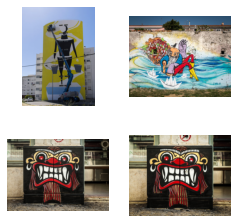

In [5]:
# Parameters for our graph; we'll output images in a 2x2 configuration
nrows = 2
ncols = 2

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index = 2
next_arm_pix = [os.path.join(train_arm_dir, fname) 
                for fname in train_arm_fnames[pic_index-2:pic_index]]
next_uniao_pix = [os.path.join(train_uniao_dir, fname) 
                for fname in train_uniao_fnames[pic_index-2:pic_index]]
next_mar_pix = [os.path.join(train_mar_dir, fname) 
                for fname in train_mar_fnames[pic_index-3:pic_index]]

for i, img_path in enumerate(next_arm_pix + next_mar_pix + next_uniao_pix):
# for i, img_path in enumerate(next_arm_pix + next_uniao_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(64, 3, activation='relu')(x)
# x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(3, activation='softmax')(x)

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

2022-03-23 14:19:01.873164: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-23 14:19:01.873214: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arch): /proc/driver/nvidia/version does not exist
2022-03-23 14:19:01.873801: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(learning_rate=0.001),
            metrics=['acc'])

In [8]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=6,
        class_mode='categorical',
        subset='training')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=2,
        class_mode='categorical')

Found 44 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


In [9]:
history = model.fit(
      train_generator,
      # steps_per_epoch=4,
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=2,
      verbose=1)

Epoch 1/20
8/8 [==============================] - 4s 449ms/step - loss: 3.8594 - acc: 0.3182 - val_loss: 1.0159 - val_acc: 0.4545
Epoch 2/20
8/8 [==============================] - 3s 401ms/step - loss: 1.3224 - acc: 0.5455 - val_loss: 1.0340 - val_acc: 0.2727
Epoch 3/20
8/8 [==============================] - 3s 412ms/step - loss: 1.1899 - acc: 0.4545 - val_loss: 1.1093 - val_acc: 0.4545
Epoch 4/20
8/8 [==============================] - 3s 400ms/step - loss: 0.8492 - acc: 0.7273 - val_loss: 0.8088 - val_acc: 0.5455
Epoch 5/20
8/8 [==============================] - 3s 407ms/step - loss: 0.6921 - acc: 0.6364 - val_loss: 0.7669 - val_acc: 0.6364
Epoch 6/20
8/8 [==============================] - 3s 421ms/step - loss: 0.3458 - acc: 0.8864 - val_loss: 0.5179 - val_acc: 0.9091
Epoch 7/20
8/8 [==============================] - 3s 398ms/step - loss: 0.1787 - acc: 0.9545 - val_loss: 0.7674 - val_acc: 0.6364
Epoch 8/20
8/8 [==============================] - 3s 403ms/step - loss: 0.1690 - acc: 0.95

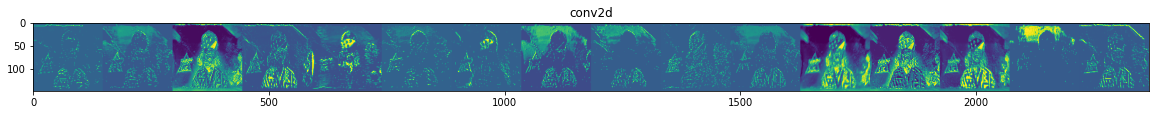

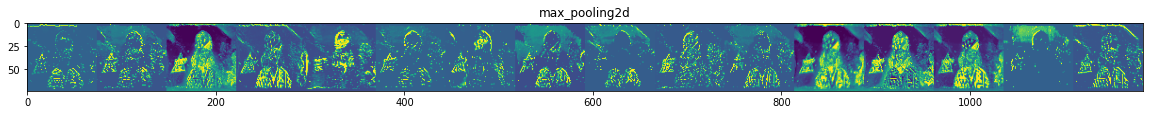

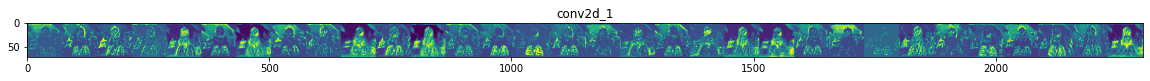

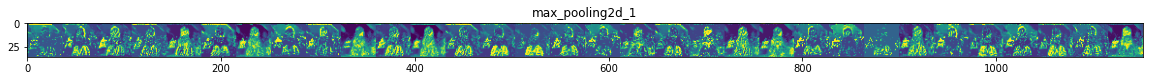

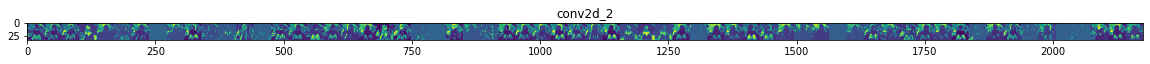

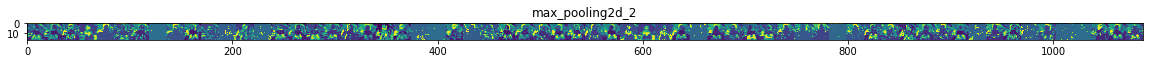

In [10]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
arm_img_files = [os.path.join(train_arm_dir, f) for f in train_arm_fnames]
mar_img_files = [os.path.join(train_mar_dir, f) for f in train_mar_fnames]
uniao_img_files = [os.path.join(train_uniao_dir, f) for f in train_uniao_fnames]
img_path = random.choice(arm_img_files + mar_img_files + uniao_img_files)
# img_path = random.choice(arm_img_files + uniao_img_files)


img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

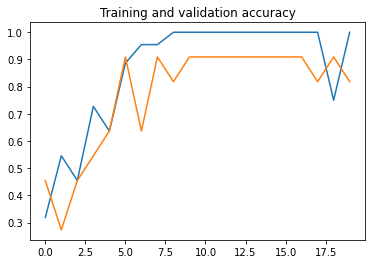

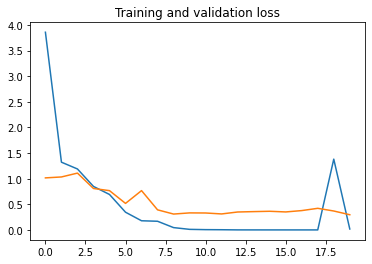

In [11]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')